<a href="https://colab.research.google.com/github/igors96/MNIST_Redes_Neurais/blob/main/MNIST_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.datasets import mnist

In [ ]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_treino.shape

(60000, 28, 28)

In [ ]:
from keras.utils import np_utils
y_treino_convertido = np_utils.to_categorical(y_treino)
y_teste_convertido = np_utils.to_categorical(y_teste)

In [ ]:
y_treino_convertido[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

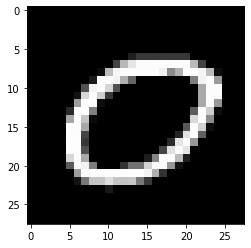

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_treino[156], cmap = 'gray')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras.layers import Dropout

In [ ]:
x_treino.shape

(60000, 28, 28)

In [ ]:
x_treino_remodelado = x_treino.reshape((60000, 784))
x_teste_remodelado = x_teste.reshape((10000, 784))

In [ ]:
x_treino_normalizado = x_treino_remodelado.astype('float32') / 255
x_teste_normalizado = x_teste_remodelado.astype('float32') / 255

In [ ]:
x_treino_normalizado[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
modelo = Sequential()
modelo.add(Dense(30, input_dim = 784, kernel_initializer = 'normal', activation = 'relu')) #Entrada & primeira camada oculta
modelo.add(Dense(30, kernel_initializer = 'normal', activation = 'relu')) #Segunda camada oculta
modelo.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax')) #Saída


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import SGD
otimizador = tensorflow.keras.optimizers.SGD(momentum = 0.9)

In [ ]:
modelo.compile(loss = 'categorical_crossentropy', optimizer = otimizador, metrics = ['acc'])
historico = modelo.fit(x_treino_normalizado, y_treino_convertido, epochs = 40, batch_size = 200, validation_data = (x_teste_normalizado, y_teste_convertido), verbose = 1)

2022-10-20 20:52:57.322069: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
300/300 [==============================] - 2s 4ms/step - loss: 1.6719 - acc: 0.4546 - val_loss: 0.6398 - val_acc: 0.8004
Epoch 2/40
300/300 [==============================] - 1s 3ms/step - loss: 0.4692 - acc: 0.8631 - val_loss: 0.3627 - val_acc: 0.8954
Epoch 3/40
300/300 [==============================] - 1s 3ms/step - loss: 0.3420 - acc: 0.9025 - val_loss: 0.3110 - val_acc: 0.9106
Epoch 4/40
300/300 [==============================] - 1s 4ms/step - loss: 0.2921 - acc: 0.9166 - val_loss: 0.2664 - val_acc: 0.9231
Epoch 5/40
300/300 [==============================] - 1s 4ms/step - loss: 0.2527 - acc: 0.9282 - val_loss: 0.2326 - val_acc: 0.9338
Epoch 6/40
300/300 [==============================] - 1s 4ms/step - loss: 0.2209 - acc: 0.9374 - val_loss: 0.2121 - val_acc: 0.9370
Epoch 7/40
300/300 [==============================] - 1s 3ms/step - loss: 0.1967 - acc: 0.9434 - val_loss: 0.1827 - val_acc: 0.9481
Epoch 8/40
300/300 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
historico.history['acc']

[0.45463332533836365,
 0.8631166815757751,
 0.9024999737739563,
 0.9166499972343445,
 0.9282333254814148,
 0.9373999834060669,
 0.9433833360671997,
 0.9484000205993652,
 0.9528166651725769,
 0.9563000202178955,
 0.9587833285331726,
 0.9608500003814697,
 0.9635666608810425,
 0.9662333130836487,
 0.9673500061035156,
 0.9691333174705505,
 0.9700000286102295,
 0.9721999764442444,
 0.9723166823387146,
 0.9737333059310913,
 0.9745500087738037,
 0.975683331489563,
 0.9758833050727844,
 0.9774666428565979,
 0.9783999919891357,
 0.9790833592414856,
 0.9789333343505859,
 0.9803500175476074,
 0.9803000092506409,
 0.9813166856765747,
 0.9805166721343994,
 0.982450008392334,
 0.9827666878700256,
 0.9824833273887634,
 0.9831333160400391,
 0.9835833311080933,
 0.9842666387557983,
 0.9842166900634766,
 0.9849166870117188,
 0.9854333400726318]

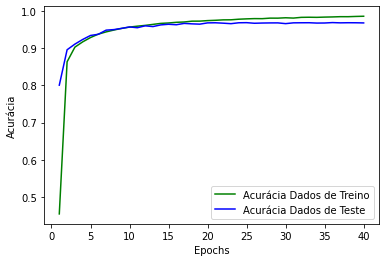

In [ ]:
# Graficando acurácia dos dados de treino e teste

acuracia_treino = historico.history['acc']
acuracia_teste = historico.history['val_acc']

epochs = range(1, len(acuracia_treino)+1)

plt.plot(epochs, acuracia_treino, '-g', label = 'Acurácia Dados de Treino')
plt.plot(epochs, acuracia_teste, '-b', label = 'Acurácia Dados de Teste')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()